In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import gensim

from gensim.models import Word2Vec, KeyedVectors

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt
import nltk

from tensorflow.keras.utils import to_categorical

In [2]:
from wordcloud import WordCloud

In [3]:
data = pd.read_csv("data/news_class.csv")

df = data.copy() # to be safe and avoid errors

df = df.loc[:,["data_id" , "content" , "category_level_1" , "category_level_2"]]
df.groupby(['category_level_1'])['data_id'].agg('count')

category_level_1
arts, culture, entertainment and media        300
conflict, war and peace                       800
crime, law and justice                        500
disaster, accident and emergency incident     500
economy, business and finance                 400
education                                     607
environment                                   600
health                                        700
human interest                                600
labour                                        703
lifestyle and leisure                         300
politics                                      900
religion and belief                           800
science and technology                        800
society                                      1100
sport                                         907
weather                                       400
Name: data_id, dtype: int64

In [4]:
df.content[371]

'A fitness class has become the first in Scotland to practice pilates - with goats.\n\nThe bizarre exercise , which involves two baby goats climbing on top of participants, has taken off at Bellcraig Farm, Glenrothes, Fife.\n\nOrganiser Jo Munro said one-year-old kids Hazel and Mabel love to interact with humans at the fitness class.\n\nThe loveable animals help release feel-good hormones such as serotonin and make pilate-goers relax more as they stretch on their mats in a barn.\n\nInstructor Jo, 39, was inspired to launch the first classes in Scotland after taking part in goat yoga classes while on holiday in the US.\n\nThe classes of up to six participants start by collecting the kids from the field before standing on mats in a stone built cottage.\n\nThe group, which is the first in the UK to use African pygmy goats, warms up, while their four-legged friends inquisitively sniff around.\n\nJo, from Edinburgh, said: "I went to California last year and it\'s massive there so I went and

In [5]:
df.loc[371]

data_id                                                        649424
content             A fitness class has become the first in Scotla...
category_level_1                                lifestyle and leisure
category_level_2                                 exercise and fitness
Name: 371, dtype: object

In [6]:
df.content[374]

'A fitness class has become the first in Scotland to practice pilates - with GOATS.\n\nThe bizarre exercise, which involves two baby goats climbing on top of participants, has taken off at Bellcraig Farm, Glenrothes, Fife.\n\nOrganiser Jo Munro said one-year-old kids Hazel and Mabel love to interact with humans at the fitness class.\n\nThe loveable animals help release "feelgood" hormones such as serotonin and make pilate-goers relax more as they stretch on their mats in a barn.\n\nInstructor Jo, 39, was inspired to launch the first classes in Scotland after taking part in goat yoga classes while on holiday in the US.\n\nThe classes of up to six participants start by collecting the kids from the field before standing on mats in a stone built cottage.\n\nThe group, which is the first in the UK to use African pygmy goats, warms up, while their four-legged friends inquisitively sniff around.\n\nJo, from Edinburgh, said: "I went to California last year and it\'s massive there so I went and

In [7]:
df.content[6528]

'\n\n'

In [8]:
df.loc[6528]

data_id                  142211
content                    \n\n
category_level_1          sport
category_level_2    sport event
Name: 6528, dtype: object

In [9]:
df.tail()

,data_id,content,category_level_1,category_level_2
10912,907640,This post was originally published on this sit...,"conflict, war and peace",post-war reconstruction
10913,892720,This post was originally published on this sit...,"conflict, war and peace",post-war reconstruction
10914,870499,This\n\n[post](http://www.presstv.ir/Detail/20...,"conflict, war and peace",post-war reconstruction
10915,887334,This\n\n[post](http://www.presstv.ir/Detail/20...,"conflict, war and peace",post-war reconstruction
10916,885988,This\n\n[post](https://tass.com/politics/10791...,"conflict, war and peace",post-war reconstruction


In [10]:
df.groupby(['category_level_2'])['data_id'].agg('count')

category_level_2
accident and emergency incident    100
accomplishment                     100
act of terror                      100
animal                             100
anniversary                        100
                                  ... 
weather forecast                   100
weather phenomena                  100
weather statistic                  100
weather warning                    100
welfare                            100
Name: data_id, Length: 109, dtype: int64

<Axes: ylabel='category_level_1'>

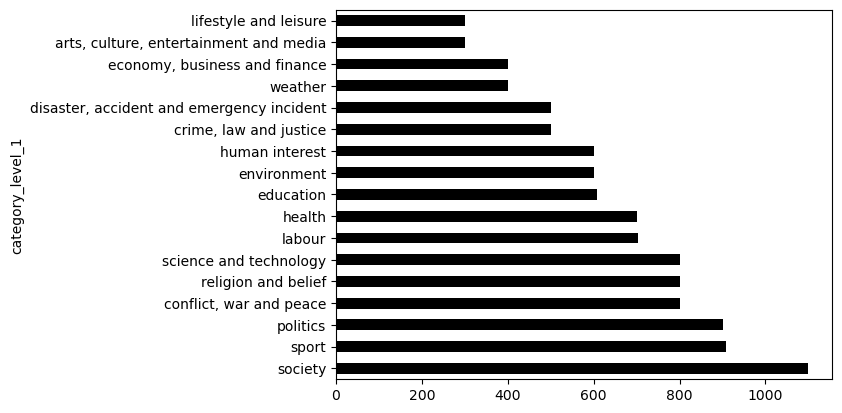

In [11]:
df['category_level_1'].value_counts().plot(kind='barh' , colormap = 'gist_heat')

In [12]:
# Function for removing ASCII characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting to lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words

def remove_stop_words(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text =  tokenizer.tokenize(text)
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text


# Function for removing html
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

def lemm_text(text):
    lemm=WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    tokens = text
    return ' '.join([lemm.lemmatize(t) for t in tokens])


def remove_digits(text):
    text = re.sub(r'\d', '', text)
    #text = " ".join(text)
    return text

In [13]:
df['Cleaned'] = df['content'].apply(_removeNonAscii)
df['Cleaned'] = df.Cleaned.apply(func = make_lower_case)
df['Cleaned'] = df.Cleaned.apply(func = remove_stop_words)
df['Cleaned'] = df.Cleaned.apply(func = remove_punctuation)
df['Cleaned'] = df.Cleaned.apply(func = remove_html)
df['Cleaned'] = df.Cleaned.apply(func = lemm_text)
df['Cleaned'] = df.Cleaned.apply(func = remove_digits)
df = df.drop('content' , axis =1)

In [14]:
df.Cleaned[371]

'fitness class become first scotland practice pilate goat bizarre exercise involves two baby goat climbing top participant taken bellcraig farm glenrothes fife organiser jo munro said one year old kid hazel mabel love interact human fitness class loveable animal help release feel good hormone serotonin make pilate goer relax stretch mat barn instructor jo  inspired launch first class scotland taking part goat yoga class holiday u class six participant start collecting kid field standing mat stone built cottage group first uk use african pygmy goat warms four legged friend inquisitively sniff around jo edinburgh said went california last year massive went tried thought bring back scotland sore goat reasonably heavy make challenging kid quite agile nimble like massage hoof want bare skin people arrive go collect goat field take little stone cottage stove nice cosy maximum six people two goat goat pilate something everyone seen youtube think either love hate complete hilarity make everyon

In [15]:
df.Cleaned[374]

'fitness class become first scotland practice pilate goat bizarre exercise involves two baby goat climbing top participant taken bellcraig farm glenrothes fife organiser jo munro said one year old kid hazel mabel love interact human fitness class loveable animal help release feelgood hormone serotonin make pilate goer relax stretch mat barn instructor jo  inspired launch first class scotland taking part goat yoga class holiday u class six participant start collecting kid field standing mat stone built cottage group first uk use african pygmy goat warms four legged friend inquisitively sniff around jo edinburgh said went california last year massive went tried thought bring back scotland sore goat reasonably heavy make challenging kid quite agile nimble like massage hoof want bare skin people arrive go collect goat field take little stone cottage stove nice cosy maximum six people two goat goat pilate something everyone seen youtube think either love hate complete hilarity make everyone

In [16]:
df.Cleaned[6528]

''

In [17]:
io = df.copy()

io = io.drop([374]).reset_index(drop=True)
io = io.drop([6527]).reset_index(drop=True)

corpus_full = []
for words in io['Cleaned']:
    corpus_full.append(words.split()) 

In [53]:
corpus_full[1]

['authority',
 'trying',
 'determine',
 'anyone',
 'helped',
 'two',
 'inmate',
 'escaped',
 'california',
 'jail',
 'traveled',
 'hundred',
 'mile',
 'crossed',
 'mexico',
 'captured',
 'trying',
 'walk',
 'back',
 'united',
 'state',
 'jonathan',
 'salazar',
 'santos',
 'fonseca',
 'arrested',
 'u',
 'custom',
 'border',
 'protection',
 'official',
 'port',
 'entry',
 'san',
 'ysidro',
 'nation',
 'largest',
 'border',
 'crossing',
 'early',
 'wednesday',
 'monterey',
 'county',
 'sheriff',
 'office',
 'capt',
 'john',
 'thornburg',
 'said',
 'thornburg',
 'said',
 'two',
 'custody',
 'monterey',
 'county',
 'official',
 'returned',
 'jail',
 'salina',
 'farming',
 'city',
 'people',
 'roughly',
 'mile',
 'kilometer',
 'south',
 'san',
 'francisco',
 'salazar',
 'fonseca',
 'escaped',
 'sunday',
 'lockup',
 'salina',
 'climbing',
 'hole',
 'made',
 'ceiling',
 'bathroom',
 'squeezing',
 'hollow',
 'wall',
 'kicking',
 'open',
 'hatch',
 'official',
 'found',
 'jail',
 'issued',
 'jum

In [37]:
def labeler(dataframe_column):
    encoder=LabelEncoder()
    
    labels = encoder.fit_transform(dataframe_column)
    print(encoder.classes_)
    print("We did it boys , labels have been created")
    
    return(pd.DataFrame(labels))

In [38]:
def vectorizer():
    
    
    # Creating a list for storing the vectors ('Description' into vectors)
    #global word_embeddings
    word_embeddings = []
    i = 0
    # Reading the each 'Description'
    for line in io['Cleaned']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in model.wv.key_to_index:
                count += 1
                if avgword2vec is None:
                    avgword2vec = model.wv[word]
                else:
                    avgword2vec = avgword2vec + model.wv[word]
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
            word_embeddings.append(avgword2vec)
        else:
            print("I found it , the error occurs at line:" , i)
          
        i +=1 

    return(pd.DataFrame(word_embeddings))  # Returning our Data as a Dataframe (aesthetic reasons)

In [8]:
model = Word2Vec(sentences=corpus_full, vector_size=600, window=4, min_count=10, sg = 1 , hs = 1)  # skipgram architecture

In [10]:
model.save("model_4_a_parenthesis.h3")

In [39]:
model = Word2Vec.load("model_4_a_parenthesis.h3")

In [40]:
print(model)

Word2Vec<vocab=21958, vector_size=600, alpha=0.025>


In [41]:
vect = vectorizer()

In [44]:
y1 = labeler(io["category_level_1"])


X = vect.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2,random_state=42)

y_train1 = to_categorical(y_train)

['arts, culture, entertainment and media' 'conflict, war and peace'
 'crime, law and justice' 'disaster, accident and emergency incident'
 'economy, business and finance' 'education' 'environment' 'health'
 'human interest' 'labour' 'lifestyle and leisure' 'politics'
 'religion and belief' 'science and technology' 'society' 'sport'
 'weather']
We did it boys , labels have been created


In [45]:
y_test1 = to_categorical(y_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Flatten , Input , Conv2D , MaxPooling2D , BatchNormalization

In [47]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="sigmoid")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

In [48]:
my_model= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")

In [49]:
my_model.summary()

Model: "News_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embs (InputLayer)           [(None, 600)]             0         
                                                                 
 dense (Dense)               (None, 200)               120200    
                                                                 
 dense_1 (Dense)             (None, 360)               72360     
                                                                 
 dropout (Dropout)           (None, 360)               0         
                                                                 
 dense_2 (Dense)             (None, 17)                6137      
                                                                 
Total params: 198697 (776.16 KB)
Trainable params: 198697 (776.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)

In [51]:
my_model.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

In [52]:
my_model.fit(X_train , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10

437/437 [==============================] - 3s 4ms/step - loss: 1.8567 - accuracy: 0.9489 - precision: 0.7047 - recall: 0.2262 - val_loss: 1.2762 - val_accuracy: 0.9583 - val_precision: 0.7634 - val_recall: 0.4230
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 1.2124 - accuracy: 0.9591 - precision: 0.7453 - recall: 0.4639 - val_loss: 1.1716 - val_accuracy: 0.9624 - val_precision: 0.7654 - val_recall: 0.5192
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 1.0547 - accuracy: 0.9641 - precision: 0.7749 - recall: 0.5490 - val_loss: 1.1453 - val_accuracy: 0.9629 - val_precision: 0.7547 - val_recall: 0.5478
Epoch 4/10
437/437 [==============================] - 2s 3ms/step - loss: 0.9656 - accuracy: 0.9668 - precision: 0.7905 - recall: 0.5920 - val_loss: 1.1085 - val_accuracy: 0.9644 - val_precision: 0.7554 - val_recall: 0.5833
Epoch 5/10
437/437 [==============================] - 1s 3ms/step - loss: 0.9063 - accuracy: 0.9691 - p

In [185]:
my_model.fit(X_train , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 2s 4ms/step - loss: 0.6613 - accuracy: 0.9763 - precision: 0.8468 - recall: 0.7296 - val_loss: 1.2506 - val_accuracy: 0.9658 - val_precision: 0.7424 - val_recall: 0.6417
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 0.6440 - accuracy: 0.9770 - precision: 0.8522 - recall: 0.7366 - val_loss: 1.2004 - val_accuracy: 0.9683 - val_precision: 0.7680 - val_recall: 0.6611
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 0.6256 - accuracy: 0.9776 - precision: 0.8568 - recall: 0.7437 - val_loss: 1.2966 - val_accuracy: 0.9663 - val_precision: 0.7467 - val_recall: 0.6463
Epoch 4/10
437/437 [==============================] - 2s 4ms/step - loss: 0.5815 - accuracy: 0.9791 - precision: 0.8657 - recall: 0.7632 - val_loss: 1.3557 - val_accuracy: 0.9660 - val_precision: 0.7415 - val_recall: 0.6468
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 0.5512 - accuracy: 0.9805 - pr

In [186]:
#############################################################################################################################

In [190]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="gelu")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

In [191]:
my_model2= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")

In [192]:
opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)





my_model2.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





my_model2.fit(X_train , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model2.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 1.5045 - accuracy: 0.9534 - precision: 0.6876 - recall: 0.3800 - val_loss: 1.4381 - val_accuracy: 0.9560 - val_precision: 0.6730 - val_recall: 0.4888
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 1.2641 - accuracy: 0.9600 - precision: 0.7316 - recall: 0.5045 - val_loss: 1.2506 - val_accuracy: 0.9619 - val_precision: 0.7667 - val_recall: 0.5060
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 1.0821 - accuracy: 0.9640 - precision: 0.7585 - recall: 0.5688 - val_loss: 1.3527 - val_accuracy: 0.9593 - val_precision: 0.7125 - val_recall: 0.5163
Epoch 4/10
437/437 [==============================] - 2s 4ms/step - loss: 0.9997 - accuracy: 0.9663 - precision: 0.7724 - recall: 0.6050 - val_loss: 1.1957 - val_accuracy: 0.9646 - val_precision: 0.7758 - val_recall: 0.5604
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 0.9406 - accuracy: 0.9680 - pr

In [193]:
#############################################################################################################################

In [200]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="softplus")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

my_model3= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")


opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.99)





my_model3.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





my_model3.fit(X_train , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model3.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 3s 5ms/step - loss: 1.8772 - accuracy: 0.9483 - precision: 0.6887 - recall: 0.2210 - val_loss: 1.3498 - val_accuracy: 0.9566 - val_precision: 0.7956 - val_recall: 0.3520
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 1.2261 - accuracy: 0.9590 - precision: 0.7452 - recall: 0.4594 - val_loss: 1.2958 - val_accuracy: 0.9593 - val_precision: 0.7526 - val_recall: 0.4579
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 1.0767 - accuracy: 0.9635 - precision: 0.7763 - recall: 0.5340 - val_loss: 1.2136 - val_accuracy: 0.9613 - val_precision: 0.7475 - val_recall: 0.5169
Epoch 4/10
437/437 [==============================] - 2s 4ms/step - loss: 0.9843 - accuracy: 0.9663 - precision: 0.7929 - recall: 0.5772 - val_loss: 1.1505 - val_accuracy: 0.9638 - val_precision: 0.7579 - val_recall: 0.5644
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 0.9232 - accuracy: 0.9679 - pr

In [231]:
#############################################################################################################################

# THE BEST OF THE BEST LESGOO

In [201]:
y_test1 = to_categorical(y_test , dtype = int)

In [202]:
y_test1

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [229]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="leaky_relu")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

my_model3= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")


opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.9999)





my_model3.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





my_model3.fit(X_train , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model3.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 1.5388 - accuracy: 0.9537 - precision: 0.6983 - recall: 0.3741 - val_loss: 1.2800 - val_accuracy: 0.9600 - val_precision: 0.7504 - val_recall: 0.4785
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 1.2314 - accuracy: 0.9608 - precision: 0.7358 - recall: 0.5211 - val_loss: 1.2085 - val_accuracy: 0.9612 - val_precision: 0.7423 - val_recall: 0.5226
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 1.1424 - accuracy: 0.9632 - precision: 0.7482 - recall: 0.5651 - val_loss: 1.2361 - val_accuracy: 0.9608 - val_precision: 0.7152 - val_recall: 0.5535
Epoch 4/10
437/437 [==============================] - 2s 4ms/step - loss: 1.0405 - accuracy: 0.9661 - precision: 0.7715 - recall: 0.6029 - val_loss: 1.3299 - val_accuracy: 0.9632 - val_precision: 0.7385 - val_recall: 0.5804
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 1.0124 - accuracy: 0.9672 - pr

In [230]:
#############################################################################################################################

In [237]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="leaky_relu")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

my_model6= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")


opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.9999,
    weight_decay = 0.0005)





my_model6.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





my_model6.fit(X_train , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model6.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 1.5412 - accuracy: 0.9531 - precision: 0.6889 - recall: 0.3696 - val_loss: 1.3762 - val_accuracy: 0.9590 - val_precision: 0.7272 - val_recall: 0.4837
Epoch 2/10
437/437 [==============================] - 1s 3ms/step - loss: 1.2332 - accuracy: 0.9594 - precision: 0.7222 - recall: 0.5047 - val_loss: 1.6390 - val_accuracy: 0.9524 - val_precision: 0.6296 - val_recall: 0.4631
Epoch 3/10
437/437 [==============================] - 1s 3ms/step - loss: 1.1459 - accuracy: 0.9631 - precision: 0.7472 - recall: 0.5634 - val_loss: 1.2936 - val_accuracy: 0.9621 - val_precision: 0.7478 - val_recall: 0.5363
Epoch 4/10
437/437 [==============================] - 1s 3ms/step - loss: 1.0808 - accuracy: 0.9646 - precision: 0.7531 - recall: 0.5914 - val_loss: 1.3282 - val_accuracy: 0.9598 - val_precision: 0.7025 - val_recall: 0.5501
Epoch 5/10
437/437 [==============================] - 1s 3ms/step - loss: 1.0472 - accuracy: 0.9660 - pr

In [238]:
#############################################################################################################################

In [260]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="leaky_relu")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

my_model7= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")


opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.9999)





my_model7.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





my_model7.fit(X_train , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model7.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 1.5354 - accuracy: 0.9531 - precision: 0.6893 - recall: 0.3691 - val_loss: 1.3021 - val_accuracy: 0.9590 - val_precision: 0.7092 - val_recall: 0.5123
Epoch 2/10
437/437 [==============================] - 2s 4ms/step - loss: 1.2181 - accuracy: 0.9606 - precision: 0.7325 - recall: 0.5191 - val_loss: 1.2161 - val_accuracy: 0.9623 - val_precision: 0.7411 - val_recall: 0.5507
Epoch 3/10
437/437 [==============================] - 2s 3ms/step - loss: 1.1410 - accuracy: 0.9634 - precision: 0.7490 - recall: 0.5685 - val_loss: 1.4788 - val_accuracy: 0.9581 - val_precision: 0.7106 - val_recall: 0.4848
Epoch 4/10
437/437 [==============================] - 2s 3ms/step - loss: 1.1059 - accuracy: 0.9644 - precision: 0.7544 - recall: 0.5853 - val_loss: 1.2807 - val_accuracy: 0.9626 - val_precision: 0.7232 - val_recall: 0.5907
Epoch 5/10
437/437 [==============================] - 1s 3ms/step - loss: 1.0261 - accuracy: 0.9663 - pr

In [262]:
############################################################################################################################

In [264]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="leaky_relu")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

my_model7= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")


opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.9999)





my_model7.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





HIST = my_model7.fit(X_train , y_train1 , batch_size = 16 , epochs = 20 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model7.predict(X_test), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/20
437/437 [==============================] - 3s 5ms/step - loss: 1.5319 - accuracy: 0.9522 - precision: 0.6732 - recall: 0.3631 - val_loss: 1.2065 - val_accuracy: 0.9616 - val_precision: 0.7452 - val_recall: 0.5289
Epoch 2/20
437/437 [==============================] - 2s 4ms/step - loss: 1.2314 - accuracy: 0.9609 - precision: 0.7380 - recall: 0.5201 - val_loss: 1.3648 - val_accuracy: 0.9608 - val_precision: 0.7378 - val_recall: 0.5186
Epoch 3/20
437/437 [==============================] - 2s 4ms/step - loss: 1.1353 - accuracy: 0.9633 - precision: 0.7503 - recall: 0.5632 - val_loss: 1.3212 - val_accuracy: 0.9621 - val_precision: 0.7354 - val_recall: 0.5552
Epoch 4/20
437/437 [==============================] - 2s 4ms/step - loss: 1.0689 - accuracy: 0.9648 - precision: 0.7551 - recall: 0.5936 - val_loss: 1.2892 - val_accuracy: 0.9631 - val_precision: 0.7192 - val_recall: 0.6113
Epoch 5/20
437/437 [==============================] - 2s 4ms/step - loss: 0.9998 - accuracy: 0.9673 - pr

In [161]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    
    
    
#plot_history(HIST)

In [146]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#############################################################################################################################

In [127]:
180*1.8

324.0

In [128]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
6365,0.042972,-0.026970,0.082598,0.056326,-0.082835,-0.043904,-0.013512,0.062725,-0.070609,0.002231,...,0.046180,0.035136,0.067707,-0.024073,0.020162,0.028918,-0.009105,-0.080018,-0.033139,-0.146715
157,0.107416,0.001134,0.047227,-0.008474,-0.074913,-0.084671,0.008768,0.057579,-0.014523,0.001939,...,0.029622,0.023736,0.113346,0.006454,-0.018957,0.073273,0.063576,-0.079295,-0.064057,-0.051726
6965,-0.009282,0.007703,0.020394,-0.006004,-0.013132,-0.048185,0.005805,0.103729,0.011492,0.023246,...,0.039360,0.000841,0.060884,0.001680,-0.012822,0.018115,-0.038773,-0.005132,-0.025598,-0.033229
6350,0.072587,-0.021215,0.027167,0.029208,-0.045581,-0.062709,-0.004871,0.058923,-0.045850,-0.031050,...,0.001256,0.048269,0.060344,0.003060,-0.025728,0.044791,0.026911,-0.050924,0.008124,-0.111648
1441,0.037438,0.003314,0.051365,0.066669,-0.047582,-0.025038,0.022082,0.063387,-0.015277,-0.006303,...,0.014011,0.008331,0.077442,-0.031182,0.000692,0.003353,-0.040218,-0.080613,-0.019301,-0.075367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.054834,-0.084066,0.041280,0.068400,-0.040769,-0.039861,-0.011619,0.081288,-0.012295,-0.001441,...,0.025923,0.039915,0.054187,-0.024489,-0.009662,-0.015956,0.021816,-0.044742,0.012687,-0.077226
5191,0.003374,-0.038486,0.042642,0.046518,-0.073527,-0.036063,0.019677,0.036169,-0.009721,0.020199,...,-0.001909,0.017147,0.109485,0.008540,0.037527,0.071120,0.024304,-0.131650,-0.014097,-0.090070
5390,0.054949,-0.063370,0.044662,0.034087,-0.028922,-0.073506,-0.045036,0.009919,-0.019363,-0.013015,...,0.033424,0.022070,0.058366,-0.042853,0.008280,-0.001300,0.027709,-0.017643,-0.014169,-0.064874
860,0.038307,-0.062524,0.045962,0.046214,-0.015510,-0.051149,0.051038,0.075422,-0.010983,-0.022496,...,0.038577,0.045751,0.021833,-0.049904,0.053340,-0.054384,0.021878,-0.013912,-0.023997,-0.097453


In [140]:
X_train_mean = X_train.mean()

In [142]:
X_train_mean

0      0.038894
1     -0.014044
2      0.038034
3      0.042836
4     -0.063014
         ...   
595    0.011992
596   -0.001051
597   -0.070602
598   -0.010387
599   -0.093032
Length: 600, dtype: float32

In [156]:
X_train_new = X_train - X_train_mean

In [157]:
X_train_new

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
6365,0.004078,-0.012926,0.044564,0.013490,-0.019821,0.002913,-0.028392,0.011015,-0.044711,-0.008998,...,0.025269,0.021677,-0.007567,-0.022865,0.019008,0.016926,-0.008054,-0.009415,-0.022751,-0.053683
157,0.068522,0.015178,0.009193,-0.051310,-0.011899,-0.037854,-0.006112,0.005869,0.011375,-0.009291,...,0.008712,0.010276,0.038072,0.007663,-0.020111,0.061280,0.064627,-0.008693,-0.053670,0.041307
6965,-0.048176,0.021747,-0.017640,-0.048840,0.049882,-0.001368,-0.009075,0.052019,0.037390,0.012017,...,0.018449,-0.012619,-0.014390,0.002888,-0.013976,0.006122,-0.037721,0.065470,-0.015211,0.059803
6350,0.033694,-0.007171,-0.010867,-0.013629,0.017433,-0.015891,-0.019751,0.007213,-0.019952,-0.042279,...,-0.019655,0.034809,-0.014929,0.004269,-0.026882,0.032799,0.027962,0.019679,0.018511,-0.018616
1441,-0.001456,0.017358,0.013331,0.023832,0.015432,0.021779,0.007202,0.011677,0.010621,-0.017533,...,-0.006900,-0.005128,0.002168,-0.029973,-0.000462,-0.008640,-0.039166,-0.010011,-0.008914,0.017665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.015940,-0.070021,0.003246,0.025564,0.022245,0.006957,-0.026499,0.029578,0.013603,-0.012670,...,0.005012,0.026456,-0.021087,-0.023281,-0.010816,-0.027948,0.022867,0.025860,0.023074,0.015806
5191,-0.035519,-0.024442,0.004608,0.003682,-0.010513,0.010754,0.004797,-0.015541,0.016177,0.008970,...,-0.022820,0.003687,0.034211,0.009749,0.036373,0.059128,0.025355,-0.061048,-0.003710,0.002962
5390,0.016055,-0.049326,0.006628,-0.008749,0.034092,-0.026689,-0.059916,-0.041791,0.006535,-0.024244,...,0.012514,0.008610,-0.016908,-0.041645,0.007126,-0.013292,0.028760,0.052960,-0.003782,0.028158
860,-0.000587,-0.048480,0.007928,0.003378,0.047504,-0.004332,0.036158,0.023712,0.014915,-0.033725,...,0.017666,0.032291,-0.053441,-0.048695,0.052186,-0.066377,0.022929,0.056690,-0.013610,-0.004421


In [158]:
X_test_new = X_test - X_test.mean()

In [151]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="leaky_relu")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

my_model7= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")


opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.9999)





my_model7.compile(optimizer = opt , 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





HIST = my_model7.fit(X_train_new , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model7.predict(X_test_new), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 1.3199 - accuracy: 0.9591 - precision: 0.7331 - recall: 0.4797 - val_loss: 1.1293 - val_accuracy: 0.9638 - val_precision: 0.7563 - val_recall: 0.5667
Epoch 2/10
437/437 [==============================] - 2s 3ms/step - loss: 0.9953 - accuracy: 0.9673 - precision: 0.7785 - recall: 0.6215 - val_loss: 1.1321 - val_accuracy: 0.9658 - val_precision: 0.7692 - val_recall: 0.5970
Epoch 3/10
437/437 [==============================] - 2s 4ms/step - loss: 0.8817 - accuracy: 0.9704 - precision: 0.7944 - recall: 0.6699 - val_loss: 1.1973 - val_accuracy: 0.9647 - val_precision: 0.7346 - val_recall: 0.6274
Epoch 4/10
437/437 [==============================] - 2s 4ms/step - loss: 0.8068 - accuracy: 0.9728 - precision: 0.8092 - recall: 0.7039 - val_loss: 1.2486 - val_accuracy: 0.9655 - val_precision: 0.7441 - val_recall: 0.6308
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 0.7551 - accuracy: 0.9748 - pr

In [183]:
fc_input = tf.keras.Input(shape=(600,), name="embs")
x = tf.keras.layers.Dense(200, activation="leaky_relu")(fc_input)
#x = tf.keras.activations.swish(x)
x = tf.keras.layers.Dense(360, activation="leaky_relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
#x = tf.keras.activations.swish(x)
fc_out = tf.keras.layers.Dense(17, activation="softmax")(x)

my_model7= tf.keras.Model(inputs=fc_input, outputs=fc_out, name="News_Classifier")


opt = tf.keras.optimizers.AdamW(learning_rate =0.007 , beta_1=0.9,
    beta_2=0.999,
    use_ema=True,
    ema_momentum=0.9999 , 
    weight_decay = 0.0003)





my_model7.compile(optimizer = opt, 
              loss = 'categorical_crossentropy' ,
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])





HIST = my_model7.fit(X_train_new , y_train1 , batch_size = 16 , epochs = 10 , validation_split=(0.2) ,verbose =1)


predictions = np.argmax(my_model7.predict(X_test_new), axis=-1)

print(predictions)


print(classification_report(y_test.values , predictions))

Epoch 1/10
437/437 [==============================] - 3s 4ms/step - loss: 1.3404 - accuracy: 0.9580 - precision: 0.7185 - recall: 0.4696 - val_loss: 1.2903 - val_accuracy: 0.9597 - val_precision: 0.7126 - val_recall: 0.5266
Epoch 2/10
437/437 [==============================] - 1s 3ms/step - loss: 1.0072 - accuracy: 0.9671 - precision: 0.7785 - recall: 0.6170 - val_loss: 1.2104 - val_accuracy: 0.9645 - val_precision: 0.7442 - val_recall: 0.6045
Epoch 3/10
437/437 [==============================] - 1s 3ms/step - loss: 0.8847 - accuracy: 0.9709 - precision: 0.8021 - recall: 0.6697 - val_loss: 1.2539 - val_accuracy: 0.9642 - val_precision: 0.7386 - val_recall: 0.6050
Epoch 4/10
437/437 [==============================] - 1s 3ms/step - loss: 0.7938 - accuracy: 0.9724 - precision: 0.8062 - recall: 0.6988 - val_loss: 1.4029 - val_accuracy: 0.9627 - val_precision: 0.7094 - val_recall: 0.6205
Epoch 5/10
437/437 [==============================] - 2s 4ms/step - loss: 0.7526 - accuracy: 0.9747 - pr

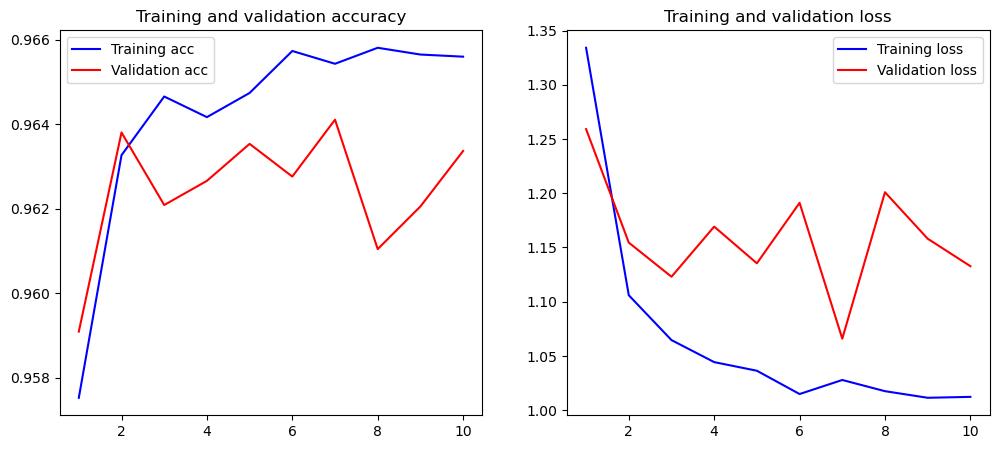

In [181]:
plot_history(HIST)